In [9]:
#coding:utf-8
import pymysql
import os
import csv
import pandas as pd
import matplotlib
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize


In [10]:
db = pymysql.connect("localhost", "root", "87869973lhy", "douban_bk", charset='utf8' )
# 使用cursor()方法获取操作游标 
cursor = db.cursor()
# 使用execute方法执行SQL语句
cursor.execute("SELECT * FROM internet_bk_all")
result = cursor.fetchall()
db.close()

in_columns = ['姓名','作者','出版年份','价格','打分人数','分数','ID','链接']
df=DataFrame(list(result),columns=in_columns)
df.head()

,姓名,作者,出版年份,价格,打分人数,分数,ID,链接
0,社群营销实战手册:从社群运营到社群经济,秋叶、邻三月、秦阳,2018,69,170,7.8,0124816,https://book.douban.com/subject/30124816/
1,信息资本主义的兴起与扩张:网络与尼克松时代,[美]丹·席勒,2018,54,61,8.6,0140441,https://book.douban.com/subject/30140441/
2,见识,吴军,2018,49,3465,8.0,0144978,https://book.douban.com/subject/30144978/
3,可伸缩服务架构：框架与中间件,李艳鹏、杨彪、李海亮、贾博岩、刘淏,2018,109,32,5.0,0159597,https://book.douban.com/subject/30159597/
4,大数据思维与应用攻略,王崇骏,2016,59,0,0.0,0163162,https://book.douban.com/subject/30163162/


In [11]:
df.columns

Index(['姓名', '作者', '出版年份', '价格', '打分人数', '分数', 'ID', '链接'], dtype='object')

In [24]:
# 打分人数top10
top10 = df.sort_values(by='打分人数',ascending=False)[:10]
top10

,姓名,作者,出版年份,价格,打分人数,分数,ID,链接
758,史蒂夫·乔布斯传,[美]沃尔特·艾萨克森,2011,68,39138,8.7,6798611,https://book.douban.com/subject/6798611/
237,影响力,[美]罗伯特·西奥迪尼,2006,45,33485,8.6,1786387,https://book.douban.com/subject/1786387/
348,世界因你不同:李开复自传,李开复、范海涛,2009,29,24554,8.1,4010196,https://book.douban.com/subject/4010196/
717,浪潮之巅,吴军,2011,55,22749,9.1,6709783,https://book.douban.com/subject/6709783/
588,从0到1:开启商业与未来的秘密,彼得·蒂尔、布莱克·马斯特斯,2015,45,21763,7.6,6297606,https://book.douban.com/subject/26297606/
340,怪诞心理学:揭秘不可思议的日常现象,[英]理查德·怀斯曼,2009,25,17543,7.3,3908032,https://book.douban.com/subject/3908032/
559,黑客与画家:硅谷创业之父PaulGraham文集,[美]PaulGraham,2011,49,16759,8.7,6021440,https://book.douban.com/subject/6021440/
126,大数据时代:生活、工作与思维的大变革,[英]维克托•迈尔•舍恩伯格（ViktorMayer-Schönberger）,2012,49,15480,7.5,0429677,https://book.douban.com/subject/20429677/
980,原则,[美]瑞·达利欧,2018,98,14892,8.4,7608239,https://book.douban.com/subject/27608239/
436,失控:全人类的最终命运和结局,[美]凯文·凯利,2010,88,14284,8.7,5375620,https://book.douban.com/subject/5375620/


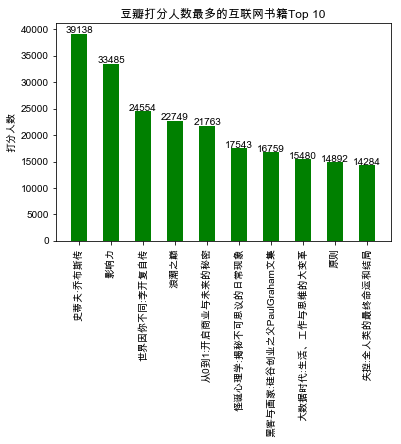

In [41]:
fig = plt.subplots(1,1)
data = Series(top10['打分人数'],index=top10['姓名'])
plt.bar(top10['姓名'],top10['打分人数'],width=0.5,color='green')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.xticks(top10['姓名'], top10['姓名'], rotation=90)
#plt.figure(figsize=(28, 12), dpi=160)
#plt.xlabel('书名')
plt.ylabel('打分人数')
plt.title('豆瓣打分人数最多的互联网书籍Top 10')
for x,y in enumerate(top10['打分人数']):
    plt.text(x,y+100,'%s' %round(y,1),ha='center')

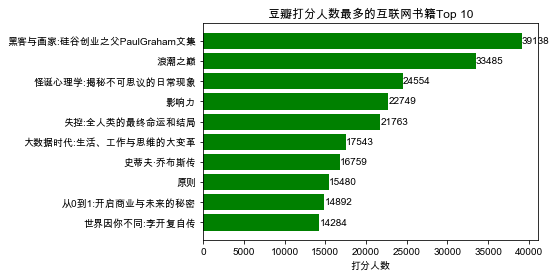

In [42]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#数据
name=top10['姓名']
colleges=top10['打分人数']
colleges = colleges.sort_values(ascending=True)
name = name.sort_values(ascending=True)
#图像绘制
fig,ax=plt.subplots()
b=ax.barh(range(len(name)),colleges,color='green')

#添加数据标签
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%d'%int(w),ha='left',va='center')

#设置Y轴刻度线标签
ax.set_yticks(range(len(name)))
ax.set_yticklabels(name)
plt.xlabel('打分人数')
plt.title('豆瓣打分人数最多的互联网书籍Top 10')
plt.show()


In [43]:
#评分人数大于100且分数最高的互联网书籍Top 10
over500 = df.loc[df['打分人数']>500]
res_over500 = over500.sort_values(by='分数',ascending=True)[-10:]
res_over500

,姓名,作者,出版年份,价格,打分人数,分数,ID,链接
395,浪潮之巅（上册）,吴军,2013,35,756,9.1,4739213,https://book.douban.com/subject/24739213/
318,"GettingReal:TheSmarter,Faster,EasierWaytoBuild...",JasonFried、HeinemeierDavidHansson、MatthewLinde...,2009,24,940,9.1,3567853,https://book.douban.com/subject/3567853/
775,Python编程:从入门到实践,[美]埃里克·马瑟斯,2016,89,1981,9.1,6829016,https://book.douban.com/subject/26829016/
16,硅谷增长黑客实战笔记,曲卉,2018,65,738,9.1,0186119,https://book.douban.com/subject/30186119/
717,浪潮之巅,吴军,2011,55,22749,9.1,6709783,https://book.douban.com/subject/6709783/
833,网络是怎样连接的,[日]户根勤,2017,49,684,9.2,6941639,https://book.douban.com/subject/26941639/
394,浪潮之巅（第2版）（套装上下册）,吴军,2013,80,2980,9.2,4738302,https://book.douban.com/subject/24738302/
396,浪潮之巅（下册）,吴军,2013,45,528,9.2,4740308,https://book.douban.com/subject/24740308/
192,TCP/IP详解卷1：协议,W.RichardStevens,2000,45,2049,9.2,1088054,https://book.douban.com/subject/1088054/
754,浪潮之巅（第三版）（上下册）,吴军,2016,99,1214,9.3,6792439,https://book.douban.com/subject/26792439/


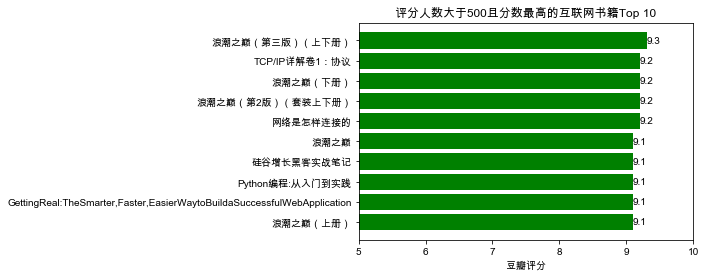

In [44]:
#数据
name=res_over500['姓名']
colleges=res_over500['分数']

#图像绘制
fig,ax=plt.subplots()
b=ax.barh(range(len(name)),colleges,color='green')

#添加数据标签
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%.1f'%w,ha='left',va='center')
plt.xlim(5, 10)
#设置Y轴刻度线标签
ax.set_yticks(range(len(name)))
ax.set_yticklabels(name)
plt.xlabel('豆瓣评分')
plt.title('评分人数大于500且分数最高的互联网书籍Top 10')
plt.show()

In [45]:
#评分人数小于500且分数最高的互联网书籍Top10
small500 = df.loc[df['打分人数']<500]
small500_2 = small500.loc[small500['打分人数']>100]
res_small500 = small500_2.sort_values('分数',ascending=True)[-10:]
res_small500

,姓名,作者,出版年份,价格,打分人数,分数,ID,链接
786,文明之光,吴军,2014,177,387,9.0,6839342,https://book.douban.com/subject/26839342/
36,码农翻身,刘欣,2018,69,374,9.0,0231515,https://book.douban.com/subject/30231515/
409,全景探秘游戏设计艺术,JesseSchell,2010,69,430,9.0,4837351,https://book.douban.com/subject/4837351/
179,信息规则:网络经济的策略指导,[美]卡尔・夏皮罗(CarlShapiro)、[美]哈尔・瓦里安(HalVarian),2000,33,306,9.0,1011731,https://book.douban.com/subject/1011731/
245,DesigningInteractions,BillMoggridge,2006,30,499,9.0,1894206,https://book.douban.com/subject/1894206/
224,"OutofControl:TheNewBiologyofMachines,SocialSys...",KevinKelly,1995,22,263,9.1,1483021,https://book.douban.com/subject/1483021/
426,信息检索导论,ChristopherD.Manning、HinrichSchütze、PrabhakarR...,2010,69,249,9.1,5252170,https://book.douban.com/subject/5252170/
264,信息论基础:（原书第2版）,[美]ThomasM.Cove,2008,58,124,9.1,2305237,https://book.douban.com/subject/2305237/
414,UNIX网络编程卷1：套接字联网API（第3版）:卷1：套接字联网API,W.RichardStevens、BillFenner、AndrewM.Rudoff,2010,129,345,9.3,4859464,https://book.douban.com/subject/4859464/
109,掘金大数据:电信数据金矿详解、挖掘及应用,程新洲、朱常波、晁昆,2019,59,286,9.5,0405895,https://book.douban.com/subject/30405895/


In [46]:
#数据
name=res_small500['姓名']
colleges=res_small500['分数']


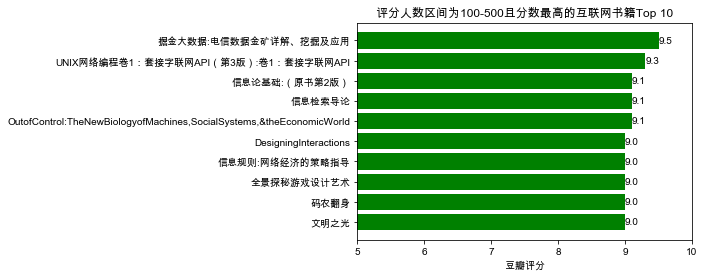

In [47]:
#图像绘制
fig,ax=plt.subplots()
b=ax.barh(range(len(name)),colleges,color='green')

#添加数据标签
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%.1f'%w,ha='left',va='center')
plt.xlim(5, 10)
#设置Y轴刻度线标签
ax.set_yticks(range(len(name)))
ax.set_yticklabels(name)
plt.xlabel('豆瓣评分')
plt.title('评分人数区间为100-500且分数最高的互联网书籍Top 10')
plt.show()

In [48]:
db = pymysql.connect("localhost", "root", "87869973lhy", "douban_bk", charset='utf8' )
# 使用cursor()方法获取操作游标 
cursor = db.cursor()
# 使用execute方法执行SQL语句
cursor.execute("SELECT * FROM auther_list")
result = cursor.fetchall()
db.close()

in_columns = ['作者','书籍数量']
df2=DataFrame(list(result),columns=in_columns)
df2[:10]

,作者,书籍数量
0,吴军,15
1,黄若,6
2,王坚,5
3,徐志斌,4
4,罗振宇,4
5,[美]凯文·凯利,4
6,周鸿祎,3
7,黄有璨,3
8,苏杰,3
9,[美]克里斯·安德森,3


In [49]:
author_top10 = df2[:10]
author_top10_2 = author_top10.sort_values(by='书籍数量',ascending=True)
author_top10_2

,作者,书籍数量
6,周鸿祎,3
7,黄有璨,3
8,苏杰,3
9,[美]克里斯·安德森,3
3,徐志斌,4
4,罗振宇,4
5,[美]凯文·凯利,4
2,王坚,5
1,黄若,6
0,吴军,15


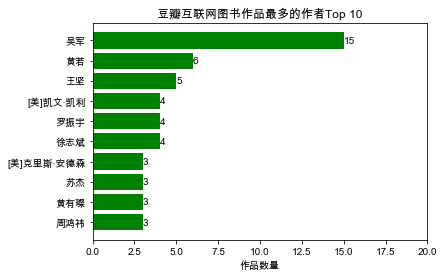

In [50]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#数据
name=author_top10_2['作者']
bk_num=author_top10_2['书籍数量']

#图像绘制
fig,ax=plt.subplots()
b=ax.barh(range(len(name)),bk_num,color='green')

#添加数据标签
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%.0f'%w,ha='left',va='center')
plt.xlim(0, 20)
#设置Y轴刻度线标签
ax.set_yticks(range(len(name)))
ax.set_yticklabels(name)
plt.xlabel('作品数量')
plt.title('豆瓣互联网图书作品最多的作者Top 10')
plt.show()

In [51]:
#评分最高的新书
new10 = df.loc[(df['出版年份']>2018)&(df['打分人数']>100)]
new10 = new10.sort_values(by='分数',ascending=True)[-10:]
new10

,姓名,作者,出版年份,价格,打分人数,分数,ID,链接
130,社交媒体简史:从莎草纸到互联网,[英]汤姆·斯丹迪奇（TomStandage）,2019,48,133,8.0,0434010,https://book.douban.com/subject/30434010/
119,在群中:数字媒体时代的大众心理学,[德]韩炳哲（Byung-ChulHan）,2019,35,173,8.1,0420818,https://book.douban.com/subject/30420818/
313,决胜B端——产品经理升级之路,杨堃,2019,69,137,8.1,3454250,https://book.douban.com/subject/33454250/
306,谷歌方法,【美】比尔•基尔迪（BillKilday）,2019,69,106,8.2,3430445,https://book.douban.com/subject/33430445/
294,全球科技通史,[美]吴军,2019,88,592,8.4,3385217,https://book.douban.com/subject/33385217/
296,幕后产品:打造突破式产品思维,王诗沐,2019,69,508,8.5,3396395,https://book.douban.com/subject/33396395/
114,因计算机而强大:计算机如何改变我们的思考与学习,[美]西摩佩珀特SeymourPapert,2019,38,173,8.7,0418117,https://book.douban.com/subject/30418117/
133,治愈未来：数字困境的全球解决方案:SocialScienceandtheFederalGov...,[美]安德鲁·基恩,2019,58,158,8.7,0460634,https://book.douban.com/subject/30460634/
374,人生护城河,张辉（@辉哥奇谭）,2019,59,121,8.7,4451688,https://book.douban.com/subject/34451688/
109,掘金大数据:电信数据金矿详解、挖掘及应用,程新洲、朱常波、晁昆,2019,59,286,9.5,0405895,https://book.douban.com/subject/30405895/


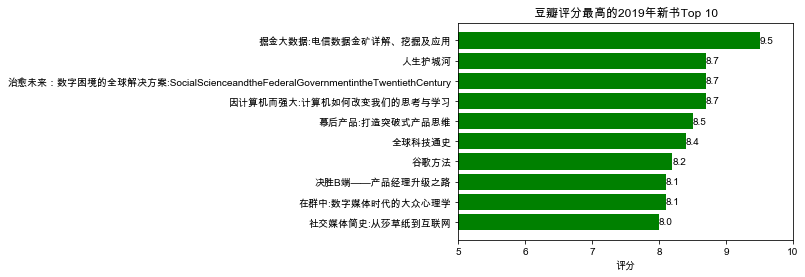

In [54]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#数据
name=new10['姓名']
bk_num=new10['分数']

#图像绘制
fig,ax=plt.subplots()
b=ax.barh(range(len(name)),bk_num,color='green')

#添加数据标签
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%.1f'%w,ha='left',va='center')
plt.xlim(5, 10)
#设置Y轴刻度线标签
ax.set_yticks(range(len(name)))
ax.set_yticklabels(name)
plt.xlabel('评分')
plt.title('豆瓣评分最高的2019年新书Top 10')
plt.show()

In [79]:
#出版年份和价格
db = pymysql.connect("localhost", "root", "87869973lhy", "douban_bk", charset='utf8' )
# 使用cursor()方法获取操作游标 
cursor = db.cursor()
# 使用execute方法执行SQL语句
cursor.execute("SELECT * FROM pub_date_price")
result = cursor.fetchall()
db.close()

in_columns = ['出版年份','评分']
df3=DataFrame(list(result),columns=in_columns)
df3

rst = df3[20:40]
rst

,出版年份,评分
20,2019,5.60313
21,2018,6.22124
22,2017,6.62443
23,2016,7.07379
24,2015,6.98981
25,2014,7.48155
26,2013,7.40000
27,2012,7.30204
28,2011,7.68776
29,2010,7.24146


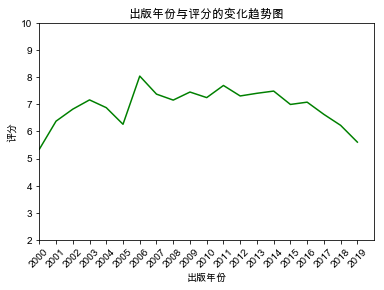

In [96]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#数据
year=rst['出版年份']
price=rst['评分']

plt.xlim(2000, 2020)
plt.ylim(2,10)
plt.plot(year,price,color='green')
plt.xticks(year,year[::1],rotation=45)
plt.xlabel('出版年份')
plt.ylabel('评分')
plt.title('出版年份与评分的变化趋势图')

plt.show()